In [1]:
import jax.numpy as jnp
import jax
import cryojax as cx
import new_simple_simulator as sim

import logging
from functools import partial



Device :  cpu


/Users/levans/venvs/cryojax_equinox/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Create list of pdb files, and define a list of weights

In [2]:
import os
path_to_models="data/hsp90_models"
model_fnames = []
for model_fname in sorted(os.listdir(path_to_models)):
    model_fnames.append(model_fname)

# Define weights: for now, just a constant vector
weights_models = (1/len(model_fnames))*jnp.ones(len(model_fnames))


# Define a config file

In [3]:
# Bare bones config for this notebook
config = {
"number_of_images": 50,
"noise_snr": 0.1,
"weights_models": weights_models,
"box_size": 128,
"models_fnames": model_fnames, 
"rng_seed": 0,
"path_to_models": path_to_models, 
"pixel_size": 1.6,
}
# Config with more options given more customizable parts as needed
#config = {
#"amplitude_contrast_ratio": 0.1, 
#"astigmatism_angle": 0.0,
#"astigmatism_in_angstroms": 0.0, 
#"batch_size": 5000,
#"box_size": 128,
#"ctf_scale_factor": 1.0,
#"defocus_in_angstroms": 150.0,
#"envelope_bfactor": 0.0,
#"experiment_name":"Heterogeneous dataset",
#"models_fnames": model_fnames, 
#"rng_seed": 0,
#"noise_snr": 0.1,
#"noise_radius_mask": 0.7,
#"number_of_images": 5000,
#"offset_x_in_angstroms": 0.0,
#"offset_y_in_angstroms": 0.0,
#"overwrite": True,
#"path_to_models": "/mnt/home/levans/Projects/cryo_sbvi/hsp90_models", 
#"path_to_relion_project": "/mnt/home/levans/Projects/cryo_sbvi/",
#"path_to_starfile": "/mnt/home/levans/Projects/cryo_sbvi/",
#"phase_shift": 0.0,
#"pixel_size": 2.0,
#"spherical_aberration_in_mm": 0.27,
#"voltage_in_kilovolts": 10.0,
#"weights_models": weights_models
#}


# Helper functions

In [4]:
# Plotting imports and functions
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot_image(image, fig, ax, cmap="gray", label=None, **kwargs):
    im = ax.imshow(image, cmap=cmap, origin="lower", **kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)
    if label is not None:
        ax.set(title=label)
    return fig, ax

# Simulate a dataset!

def prior():
...#sample weights in here

weights = prior.sample
simulate from weights....

# Make imaging pipeline

In [5]:
# Image formation
args = sim.build_image_formation_stuff(config)

# Generate RNG keys
key = jax.random.PRNGKey(config["rng_seed"])
key, *subkeys = jax.random.split(key, config["number_of_images"] + 1)
subkeys = jnp.array(subkeys)

# Pipeline
imaging_pipeline = sim.make_imaging_pipeline(subkeys, args)




# Trying out printing stuff

In [6]:

# get conformations
print(imaging_pipeline.scattering_theory.structural_ensemble.conformation.value)

# get poses
print(imaging_pipeline.scattering_theory.structural_ensemble.pose.view_phi)

# get poses
print(imaging_pipeline.scattering_theory.structural_ensemble.pose.view_phi)




[ 5 19 13 14 19 11  3  2  3 12  3  9  7  8 14  4 17 12 17 14  2  8 14 13
 17 11 18  5 15 11 17 16  1  6 11 16 15 17  3 14 19 15 11 17  6 17 14 16
  9  3]
[ 146.61451974   27.32159707  166.39463272  -88.97442675   68.1500368
   12.5164687  -136.86981444  -69.42461362  139.67200921   38.01444489
   25.91302217  -42.06309189 -145.58772485   16.48915934  -78.54018977
  164.94330063   12.79255704 -114.28779489   76.40843325  -91.04073913
  -27.66703037 -102.81279387  102.35568586   37.78404123  -87.11838423
  -84.58844497   63.85109361  -38.69104377   73.39630135   84.07831899
 -179.45361755 -179.35575786 -124.23094      68.48120583  -49.53685723
  150.71030607  104.3701289    48.38490141  164.31961291  130.23493664
  141.81369022  105.37270861  -21.35579368  120.15940969   52.07113563
 -128.84132707 -162.94262971  -27.0815604  -161.50464114 -118.19516033]
[ 146.61451974   27.32159707  166.39463272  -88.97442675   68.1500368
   12.5164687  -136.86981444  -69.42461362  139.67200921   38.0144

In [7]:

noise_grid = jnp.linspace(
              -0.5 * (config["box_size"] - 1),
              0.5 * (config["box_size"] - 1),
              config["box_size"],
          )
noise_radius = 0.5*config["box_size"] - 1 # For now, using a disc that is radius of the image for SNR calculations
noise_args = noise_grid, noise_radius, config["noise_snr"] 


noised_images, noise_power_sq = sim.compute_image_stack_with_noise(key, config, imaging_pipeline, noise_args)

[0.00148189 0.0013696  0.00166844 0.0014416  0.00133997 0.00143832
 0.00105639 0.00144454 0.00150236 0.00144918 0.0011735  0.00182742
 0.0017225  0.00137342 0.00141746 0.00162132 0.00170813 0.00132154
 0.00151588 0.00128157 0.00124    0.00153522 0.00169876 0.00148326
 0.00132762 0.00137546 0.00152382 0.00145115 0.00139431 0.00145359
 0.00181724 0.00152602 0.001301   0.00138913 0.00171376 0.00212779
 0.00151575 0.0014946  0.00194539 0.00158434 0.00151386 0.00131011
 0.00135305 0.00158187 0.00143548 0.00145325 0.00151397 0.00148977
 0.00186726 0.00126422]


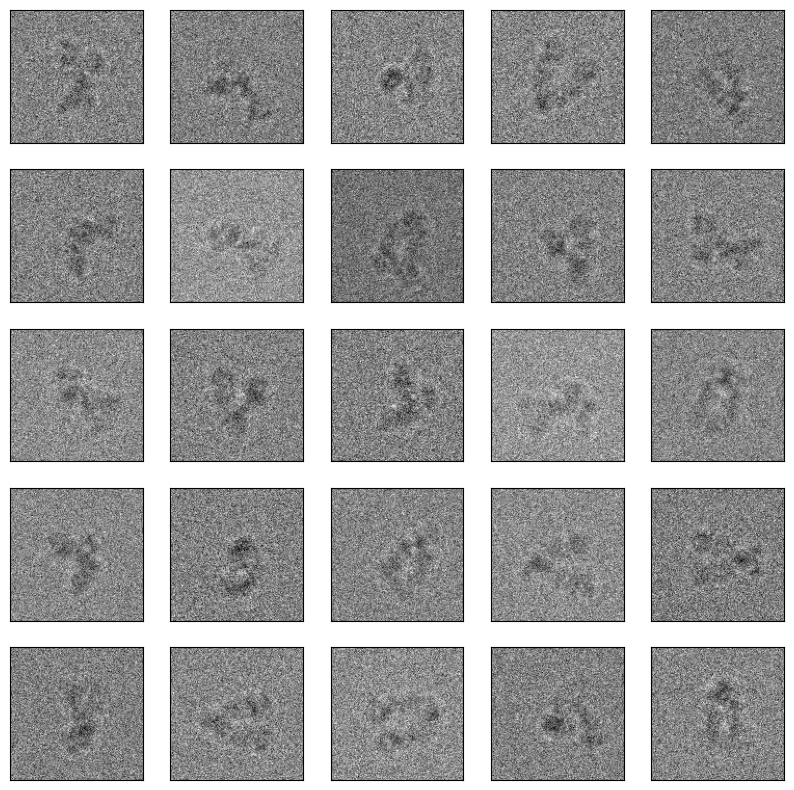

In [8]:
import matplotlib.pyplot as plt
#print(images.shape)
#for i in range(10):
#    plt.figure()
#    plt.imshow(images[i], cmap="gray")
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for idx, ax in enumerate(axes.reshape(-1)):
    ax.imshow(noised_images[idx,:], cmap="gray")
    ax.set_yticks([])
    ax.set_xticks([])
#plt.savefig(f"figures/noised_images", dpi=300)